<a href="https://colab.research.google.com/github/gever/python_notebooks/blob/master/TurtleTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install drawSvg

In [23]:
import drawSvg as draw
import math
DEG2RAD = math.pi/180
class SVGTurtle:
  def __init__(self, w=400, h=400):
    self.d = draw.Drawing(w, h, origin='center')
    self.d.setPixelScale(2)
    self.x = 0
    self.y = 0
    self.heading = 0
    self.pendown = True
    self.color = "#00eeee"

  def _line(self, x1, y1, x2, y2):
    self.d.append(draw.Lines(x1, y1, x2, y2,
                          close=False,
                          fill=None,
                          stroke=self.color))
  
  def forward(self, d):
    nx = self.x + math.cos(self.heading * DEG2RAD) * d
    ny = self.y + math.sin(self.heading * DEG2RAD) * d
    if self.pendown:
      self._line(self.x, self.y, nx, ny)
    self.x = nx
    self.y = ny
  
  def rectangle(self, w, h):
    # does not move the turtle
    self.d.append(draw.Rectangle(x=self.x, y=self.y, width=w, height=h, stroke=self.color, fill="rgba(0,0,0,0)"))

  def pen_down(self):
    self.pendown = True
  
  def pen_up(self):
    self.pendown = False

  def right(self, delta):
    self.heading += delta
  
  def left(self, delta):
    self.heading -= delta

  def set_color(self, c):
    self.color = c
  
  def jump_to(self, x, y):
    if self.pendown:
      self._line(self.x, self.y, x, y)
    self.x = x
    self.y = y

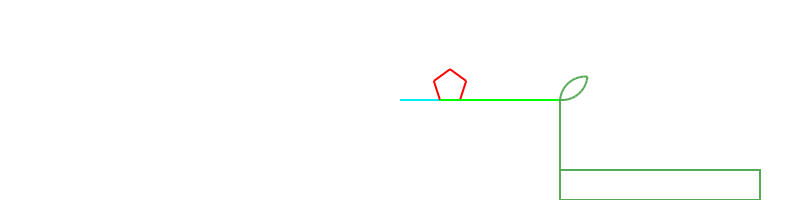

In [24]:
t = SVGTurtle(400, 100)

def square(s):
  for i in range(5):
    t.forward(s)
    t.right(90)

def ngon(n,s):
  for i in range(n):
    t.forward(s)
    t.right(360/n)

def arc(s):
  for i in range(10):
    t.forward(s)
    t.right(9)

def leaf(s):
  arc(s)
  t.right(90)
  arc(s)

t.forward(20)
t.set_color("#ff0000")
ngon(5, 10)
t.set_color("#00ff00")
t.forward(60)
t.set_color('#55aa55')
leaf(2)
t.forward(50)
t.rectangle(100,15)
t.d.saveSvg("output.svg")
t.d  # Display as SVG